**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [2]:
#loading data set and test train split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

fashion_mnist_dataset = pd.read_csv("fashion-mnist_train.csv")


In [2]:
from sklearn.model_selection import train_test_split

fashion_mnist_dataset.head()

fashion_data = fashion_mnist_dataset.drop(['label'],axis = 1)
fashion_data_label = fashion_mnist_dataset['label']

fashion_train_features,fashion_test_features,fashion_train_label,fashion_test_label = train_test_split(fashion_data,fashion_data_label,test_size = 0.30)
"""
fashion_train_features.head()

max_value = 0

for i in range(1,785) :
    
    string = "pixel"+str(i)
    col = fashion_train_features[string]
    
    if col.max() > max_value :
        max_value = col.max()

print(max_value)
"""



'\nfashion_train_features.head()\n\nmax_value = 0\n\nfor i in range(1,785) :\n    \n    string = "pixel"+str(i)\n    col = fashion_train_features[string]\n    \n    if col.max() > max_value :\n        max_value = col.max()\n\nprint(max_value)\n'

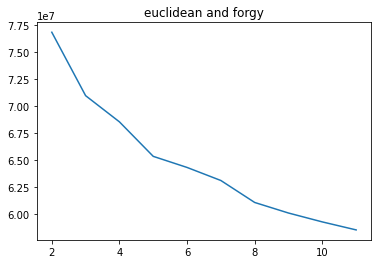

In [5]:
#implement elbow method from scratch
def elbow(distance_metric,init):
    
    #dummy_kmean = Kmeans()
    elbow_distances = []
    for i in range(2,12):
        my_kmeans = Kmeans()
        my_kmeans.fit(fashion_train_features,i,20,distance_metric,init)
        elbow_distances.append(my_kmeans.return_elbow_distance())
        #print(elbow_distances[-1]," ",i)
    
    dummy_list = []
    for i in range(2,12):
        dummy_list.append(i)
    
    #plt.title("Euclidean and Forgy")
    plt.title(distance_metric+" and "+init)
    plt.plot(dummy_list,elbow_distances)
    plt.show()
    
    """
    elbow_2 = []
    for i in range(2,12) :
        
        my_kmeans = Kmeans()
        my_kmeans.fit(fashion_train_features,i,20,"euclidean","random_partition")
        elbow_2.append(my_kmeans.return_elbow_distance())
    
    
    plt.title("Euclidean and Random Partition")
    plt.plot(dummy_list,elbow_2)
    plt.show()
    
    
    manhattan_1 = []
    
    for i in range(2,12) :
        my_kmeans = Kmeans()
        my_kmeans.fit(fashion_train_features,i,20,"manhattan","forgy")
        manhattan_1.append(my_kmeans.return_elbow_distance())
    
    
    plt.title("Manhttan and Forgy")
    plt.plot(dummy_list,manhattan_1)
    plt.show()
    
    manhattan_2 = []
    
    for i in range(2,12):
        my_kmeans = Kmeans()
        my_kmeans.fit(fashion_train_features,i,20,"manhattan","random_partition")
        manhattan_2.append(my_kmeans.return_elbow_distance())
    
    
    plt.title(" Manhattan and Random Partition")
    plt.plot(dummy_list,manhattan_2)
    plt.show()
    """


elbow("euclidean","forgy")


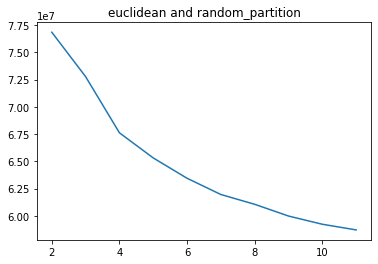

In [6]:
elbow("euclidean","random_partition")


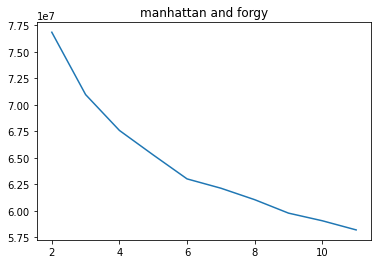

In [18]:
elbow("manhattan","forgy")


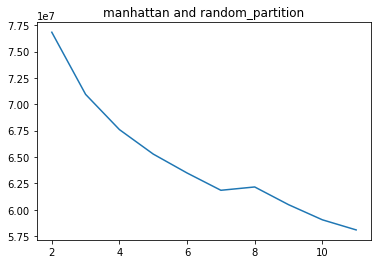

In [19]:
elbow("manhattan","random_partition")

In [10]:
from sklearn.metrics import silhouette_score

In [6]:
#implement silhouette method from scratch
from sklearn.metrics import silhouette_score

def silhouette(distance_metric,init):
    
    #elbow_distances = []
    silhouette_scores = []
    for i in range(2,12):
        my_kmeans = Kmeans()
        my_kmeans.fit(fashion_train_features,i,20,distance_metric,init)
        #elbow_distances.append(my_kmeans.return_elbow_distance())
        #print(elbow_distances[-1]," ",i)
        score1 = silhouette_score(fashion_train_features,my_kmeans.return_train_label())
        silhouette_scores.append(score1)
    
    dummy_list = []
    for i in range(2,12):
        dummy_list.append(i)
    
    #plt.title("Euclidean and Forgy")
    plt.title(distance_metric+" and "+init)
    plt.plot(dummy_list,silhouette_scores)
    plt.show()



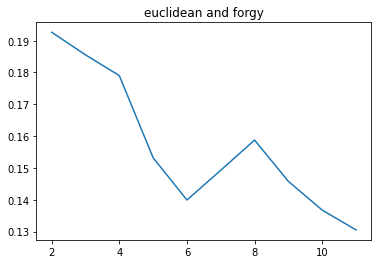

In [7]:
silhouette("euclidean","forgy")

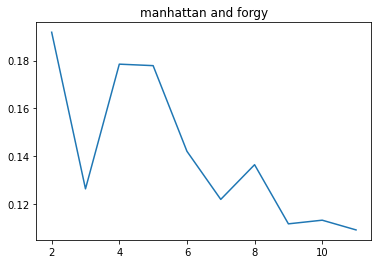

In [9]:
silhouette("manhattan","forgy")

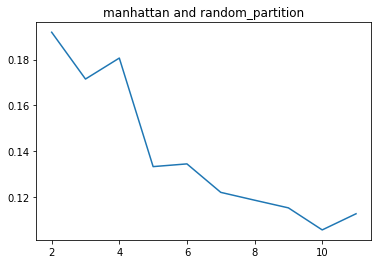

In [10]:
silhouette("manhattan","random_partition")

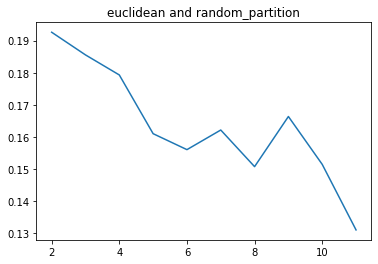

In [11]:
silhouette("euclidean","random_partition")

In [5]:
#after observing the above plots , I think the elbow point is at k=9 and the error or distance is same for almost
# all intrepretations.
plot_kmeans = Kmeans()
plot_kmeans.fit(fashion_train_features,9,20,"manhattan","forgy") #20 is enough


In [24]:
y_predicted = plot_kmeans.return_train_label()
y_predicted = np.array(y_predicted)


<class 'numpy.ndarray'>


In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2,random_state = 0)
plot_data = tsne.fit_transform(fashion_train_features)

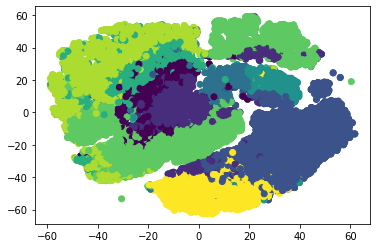

In [32]:
%matplotlib inline

#print(plot_data.shape)
#print(y_predicted.shape)

plt.scatter(plot_data[:,0],plot_data[:,1],c = y_predicted)

In [4]:
#implement Kmeans from scratch
import math
class Kmeans:
    
    def __init__(self):
        pass
    
    def fit(self,training_data,clusters,iterations,distance_metric,centroid_method) :
        
        self.training_data = training_data
        self.clusters = clusters
        self.iterations = iterations
        self.centroid_method = centroid_method
        self.data_label = [None] * self.training_data.shape[0]
        self._create_random_centroids()
        
        
        self.distance_metric = distance_metric
        
        
        self.elbow_distance = []
        for i in range(self.iterations) :
            
            self._allocate_label()
            new_centroids = self._recalculate_new_centroid()

            self.centroids = new_centroids
            cum_sum = self._calculate_elbow_distance()
        
            self.elbow_distance.append(cum_sum)
            
            #print("iteration ",i+1," completed with distance ",self.elbow_distance[-1])
            if len(self.elbow_distance) > 1 and self.elbow_distance[-1] >= self.elbow_distance[-2] :
                break
            
            
        
        
        #plt.plot(self.elbow_distance)
        #plt.grid()
        #plt.show()
        
        
    def return_elbow_distance(self) :
        
        return self.elbow_distance[-1]
    
    def _calculate_elbow_distance(self) :
        
        cumulative_square_root = 0
        
        for i in range(len(self.data_label)):
            
            dummy_array = np.array(self.training_data.iloc[i])
            dummy_array = dummy_array - self.centroids[self.data_label[i]]
            dummy_array = np.square(dummy_array)
            dummy_array_sum = np.sum(dummy_array)
            cumulative_square_root = cumulative_square_root + math.sqrt(dummy_array_sum)
            
        return cumulative_square_root
        
    
    def _create_random_centroids(self) :
        
        if self.centroid_method == "forgy" :
            
            number_of_data_points = self.training_data.shape[0]
            centroids_sel = np.random.choice(range(number_of_data_points),replace = False,size = self.clusters)
            
            self.centroids = []
            for i in centroids_sel :
                self.centroids.append(np.array(self.training_data.iloc[i]))
            
            #self.centroids = centroids
            #print(type(centroids))
        
        elif self.centroid_method == "random_partition" :
            
            labels_random = np.random.choice(range(0,self.clusters),replace = True,size = self.training_data.shape[0])
            
            self.data_label = labels_random
            self.centroids = self._recalculate_new_centroid()
            
        else :
            self.centroids = []
            
            for i in range(self.clusters):
                self.centroids.append(np.random.randint(0,high=255,size= self.training_data.shape[1]))
            
    
    def _allocate_label(self) :
        
        for i in range(self.training_data.shape[0]) :
            
            data_array = np.array(self.training_data.iloc[i])
            nearest_centroid = self._find_nearest_centroid(data_array)
            self.data_label[i] = nearest_centroid

        
    
    def _recalculate_new_centroid(self) :
        
        list1 = [[]] * self.clusters
        list2 = [0] * self.clusters
        
        for i in range(len(self.data_label)):
            
            if len(list1[self.data_label[i]]) == 0 :
                
                list1[self.data_label[i]] = np.array(self.training_data.iloc[i])
                list2[self.data_label[i]] = list2[self.data_label[i]] + 1
            
            else :
                
                list1[self.data_label[i]] = np.array(self.training_data.iloc[i])+list1[self.data_label[i]]
                list2[self.data_label[i]] = list2[self.data_label[i]] + 1
        
        for i in range(len(list1)):
            list1[i] = list1[i] / list2[i]
        
        return list1
        
    
    def _find_nearest_centroid(self,data_array) :
        
        dist_list = []
        
        if self.distance_metric == "euclidean" :
            
            for i in range(len(self.centroids)):
                dummy_array = self.centroids[i] - data_array
                dummy_array = np.square(dummy_array)
                dist_list.append(np.sum(dummy_array))
        
        elif self.distance_metric == "manhattan":
            
            for i in range(len(self.centroids)):
                
                dummy_array = self.centroids[i] - data_array
                dummy_array = np.abs(dummy_array)
                dist_list.append(np.sum(dummy_array))
        
        
        return_label = 0
        
        for i in range(len(dist_list)):
            
            if dist_list[i] < dist_list[return_label] :
                return_label = i
        
        return return_label

    def return_label(self,testing_data) :
        
        return_label_list = []
        
        for i in range(testing_data.shape[0]) :
            dummy_array = np.array(testing_data.iloc[i])
            return_label_list.append(self._find_nearest_centroid(dummy_array))
        
        return return_label_list
    
    
    def return_train_label(self):
        
        return self.data_label
    
    def return_random_labels(self) :
        pass
    def return_silhouttee(self) :
        pass
        

iteration  1  completed with distance  64082937.51347477
iteration  2  completed with distance  61200161.98189114
iteration  3  completed with distance  60643624.01758395
iteration  4  completed with distance  60232637.459577896
iteration  5  completed with distance  59927254.155659035
iteration  6  completed with distance  59769207.939352594
iteration  7  completed with distance  59688968.780165896
iteration  8  completed with distance  59629693.92598959
iteration  9  completed with distance  59578541.90203585
iteration  10  completed with distance  59537042.048044555
iteration  11  completed with distance  59505903.76805084
iteration  12  completed with distance  59477488.63712505
iteration  13  completed with distance  59450783.979799986
iteration  14  completed with distance  59423353.61653744
iteration  15  completed with distance  59390531.08153351
iteration  16  completed with distance  59359200.77734691
iteration  17  completed with distance  59334974.24692849
iteration  18  co

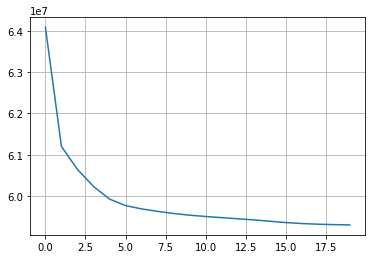

In [23]:
my_kmeans = Kmeans()
my_kmeans.fit(fashion_train_features,10,20,"euclidean","forgy") #20 is enough

iteration  1  completed with distance  67578249.97848722
iteration  2  completed with distance  62846802.100684695
iteration  3  completed with distance  61386576.10817882
iteration  4  completed with distance  60475959.687656514
iteration  5  completed with distance  59988182.36691816
iteration  6  completed with distance  59730503.10530667
iteration  7  completed with distance  59586277.72603162
iteration  8  completed with distance  59528625.42815188
iteration  9  completed with distance  59501120.18483975
iteration  10  completed with distance  59483214.23412385
iteration  11  completed with distance  59473020.92725353
iteration  12  completed with distance  59467690.79229312
iteration  13  completed with distance  59465317.6563272
iteration  14  completed with distance  59463390.5206452
iteration  15  completed with distance  59459933.246918805
iteration  16  completed with distance  59451025.535737455
iteration  17  completed with distance  59419913.66997226
iteration  18  comple

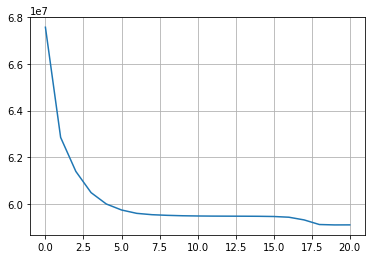

In [31]:
my_kmeans_3 = Kmeans()
my_kmeans_3.fit(fashion_train_features,10,30,"euclidean","random_partition")

iteration  1  completed with distance  62913778.57739712
iteration  2  completed with distance  61457411.88065816
iteration  3  completed with distance  61094901.323669165
iteration  4  completed with distance  60574611.86644054
iteration  5  completed with distance  60252473.17482375
iteration  6  completed with distance  60147594.74818524
iteration  7  completed with distance  60126752.452303365
iteration  8  completed with distance  60131616.51544109


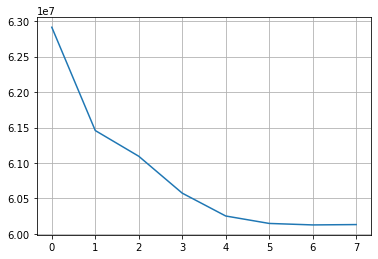

In [33]:
my_kmeans_2 = Kmeans()
my_kmeans_2.fit(fashion_train_features,10,30,"manhattan","forgy")

In [39]:
def return_accuracy(list1,list2):
    
    correct_pred = 0
    incorrect_pred = 0
    
    for i in range(len(list1)):
        
        if list1[i] == list2[i] :
            correct_pred = correct_pred + 1
        else :
            incorrect_pred = incorrect_pred + 1
    
    #print(correct_pred)
    #print(incorrect_pred)
    accuracy = correct_pred / len(list1)
    accuracy = 100 * accuracy
    
    return ["Correct Pred "+str(correct_pred),"Incorrect Pred "+str(incorrect_pred),"Accuracy "+str(accuracy)]


print("On Validation Data")
pred_1 = my_kmeans.return_label(fashion_test_features)
print(return_accuracy(pred_1,list(fashion_test_label)))
pred_2 = my_kmeans_2.return_label(fashion_test_features)
print(return_accuracy(pred_2,list(fashion_test_label)))
pred_3 = my_kmeans_3.return_label(fashion_test_features)
print(return_accuracy(pred_3,list(fashion_test_label)))


['Correct Pred 364', 'Incorrect Pred 17636', 'Accuracy 2.022222222222222']
['Correct Pred 303', 'Incorrect Pred 17697', 'Accuracy 1.6833333333333331']
['Correct Pred 3199', 'Incorrect Pred 14801', 'Accuracy 17.772222222222222']


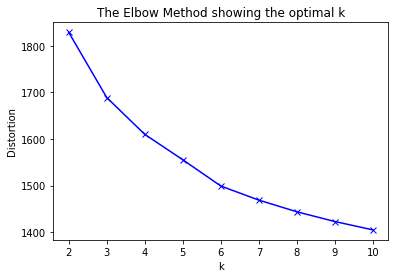

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = []
for k in range(2,11) :
    K.append(k)
    kmeanModel = KMeans(n_clusters=k).fit(fashion_train_features)
    kmeanModel.fit(fashion_train_features)
    distortions.append(sum(np.min(cdist(fashion_train_features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / fashion_train_features.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 


In [6]:
#implement Kmeans++ from scratch
import math 
class Kmeansplusplus:

    def __init__(self):
        pass
    def fit(self,training_data,clusters,iterations,distance_metric) :
        
        self.training_data = training_data
        self.clusters = clusters
        self.iterations = iterations
        #self.centroid_method = centroid_method
        self.data_label = [None] * self.training_data.shape[0]
        self._create_random_centroids()
        
        self.distance_metric = distance_metric
        
        #print("created centroids")
        self.elbow_distance = []
        for i in range(self.iterations) :
            
            self._allocate_label()
            new_centroids = self._recalculate_new_centroid()

            self.centroids = new_centroids
            cum_sum = self._calculate_elbow_distance()
        
            self.elbow_distance.append(cum_sum)
            
            #print("iteration ",i+1," completed with distance ",self.elbow_distance[-1])
            if len(self.elbow_distance) > 1 and self.elbow_distance[-1] >= self.elbow_distance[-2] :
                break
        
        #plt.plot(self.elbow_distance)
        #plt.grid()
        #plt.show()
        
        
        
    def return_elbow_distance(self) :
        
        return self.elbow_distance[-1]
    
    def _calculate_elbow_distance(self) :
        
        cumulative_square_root = 0
        
        for i in range(len(self.data_label)):
            
            dummy_array = np.array(self.training_data.iloc[i])
            dummy_array = dummy_array - self.centroids[self.data_label[i]]
            dummy_array = np.square(dummy_array)
            dummy_array_sum = np.sum(dummy_array)
            cumulative_square_root = cumulative_square_root + math.sqrt(dummy_array_sum)
            
        return cumulative_square_root
    
    """
    
    def _create_random_centroids(self) :
        
        if self.centroid_method == "forgy" :
            
            number_of_data_points = self.training_data.shape[0]
            centroids_sel = np.random.choice(range(number_of_data_points),replace = False,size = self.clusters)
            
            self.centroids = []
            for i in centroids_sel :
                self.centroids.append(np.array(self.training_data.iloc[i]))
            
            #self.centroids = centroids
            #print(type(centroids))
        
        elif self.centroid_method == "random_partition" :
            
            labels_random = np.random.choice(range(0,self.clusters),replace = True,size = self.training_data.shape[0])
            
            self.data_label = labels_random
            self.centroids = self._recalculate_new_centroid()
            
        else :
            self.centroids = []
            
            for i in range(self.clusters):
                self.centroids.append(np.random.randint(0,high=255,size= self.training_data.shape[1]))
    """
    def _calculate_min_distance(self,dummy_array) :
        
        list1 = []
        
        for i in range(len(self.centroids)) :
            new_array = dummy_array - self.centroids[i]
            new_array = np.square(new_array)
            list1.append(np.sum(new_array))
        
        return min(list1)
    def _calculate_distance_list(self):
        
        distances_list = []
        for i in range(self.training_data.shape[0]) :
            distances_list.append(self._calculate_min_distance(np.array(self.training_data.iloc[i])))
        
        return distances_list
    
    def _create_random_centroids(self) :
        
        self.centroids = []
        first_index = np.random.choice(range(self.training_data.shape[0]),)
        self.centroids.append(np.array(self.training_data.iloc[first_index]))
        
        for i in range(1,self.clusters):
            distance_list = self._calculate_distance_list()
            self.centroids.append(self.training_data.iloc[distance_list.index(max(distance_list))])
        
        #print(self.centroids)
    
    def _allocate_label(self) :
        
        for i in range(self.training_data.shape[0]) :
            
            data_array = np.array(self.training_data.iloc[i])
            nearest_centroid = self._find_nearest_centroid(data_array)
            self.data_label[i] = nearest_centroid

        
    
    def _recalculate_new_centroid(self) :
        
        list1 = [[]] * self.clusters
        list2 = [0] * self.clusters
        
        for i in range(len(self.data_label)):
            
            if len(list1[self.data_label[i]]) == 0 :
                
                list1[self.data_label[i]] = np.array(self.training_data.iloc[i])
                list2[self.data_label[i]] = list2[self.data_label[i]] + 1
            
            else :
                
                list1[self.data_label[i]] = np.array(self.training_data.iloc[i])+list1[self.data_label[i]]
                list2[self.data_label[i]] = list2[self.data_label[i]] + 1
        
        for i in range(len(list1)):
            list1[i] = list1[i] / list2[i]
        
        return list1
        
    
    def _find_nearest_centroid(self,data_array) :
        
        dist_list = []
        
        if self.distance_metric == "euclidean" :
            
            for i in range(len(self.centroids)):
                dummy_array = self.centroids[i] - data_array
                dummy_array = np.square(dummy_array)
                dist_list.append(np.sum(dummy_array))
        
        elif self.distance_metric == "manhattan":
            
            for i in range(len(self.centroids)):
                
                dummy_array = self.centroids[i] - data_array
                dummy_array = np.abs(dummy_array)
                dist_list.append(np.sum(dummy_array))
        
        
        return_label = 0
        
        for i in range(len(dist_list)):
            
            if dist_list[i] < dist_list[return_label] :
                return_label = i
        
        return return_label

    def return_label(self,testing_data) :
        
        return_label_list = []
        
        for i in range(testing_data.shape[0]) :
            dummy_array = np.array(testing_data.iloc[i])
            return_label_list.append(self._find_nearest_centroid(dummy_array))
        
        return return_label_list
    
    def return_train_label(self) :
        
        return self.data_label
            
 

In [2]:
#my_kmeanspp = Kmeansplusplus()
#my_kmeanspp.fit(fashion_train_features,10,30,"manhattan")

In [3]:
latent_data = pd.read_csv("data.csv",header = None)
latent_data.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,1.086696,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,...,0,0,0,0,0,0,0,0,0,Ankle Boot
1,5.086210,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,...,0,0,0,0,0,0,0,0,0,T-Shirt
2,1.211805,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,...,0,0,0,0,0,0,0,0,0,T-Shirt
3,3.181736,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,...,0,0,0,0,0,0,0,0,0,Dress
4,3.536458,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,...,0,0,0,0,0,0,0,0,0,T-Shirt


In [4]:
latent_data.shape

features = latent_data.loc[:,0:191]
features.head()
labels = latent_data.loc[:,192]
labels.value_counts()

 Trouser       6000
 Bag           6000
 Ankle Boot    6000
 Sneaker       6000
 Shirt         6000
 Coat          6000
 T-Shirt       6000
 Pullover      6000
 Dress         6000
 Sandal        6000
Name: 192, dtype: int64

In [41]:
""""
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
"""
#labels_encoded = np.reshape(labels_encoded,(1,-1))

#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough') 
  
#labels_final_encoded = np.array(columnTransformer.fit_transform(labels_encoded))

#labels_final_encoded.shape

'"\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\nlabel_encoder.fit(labels)\nlabels_encoded = label_encoder.transform(labels)\n\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n'

In [42]:
"""
df_Item_Type = pd.get_dummies(df.Item_Type,prefix='Item_Type', drop_first=True)
df_Outlet_Location = pd.get_dummies(df.Outlet_Location_Type,prefix='Outlet_Location_', drop_first=True)
df_Outlet_Type = pd.get_dummies(df.Outlet_Type,prefix='Outlet_Type_', drop_first=True)
"""

"\ndf_Item_Type = pd.get_dummies(df.Item_Type,prefix='Item_Type', drop_first=True)\ndf_Outlet_Location = pd.get_dummies(df.Outlet_Location_Type,prefix='Outlet_Location_', drop_first=True)\ndf_Outlet_Type = pd.get_dummies(df.Outlet_Type,prefix='Outlet_Type_', drop_first=True)\n"

In [5]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size = 0.3)

In [17]:
features_train = features_train.apply(pd.to_numeric)
features_test = features_test.apply(pd.to_numeric)

created centroids
iteration  1  completed with distance  341541.61724693875
iteration  2  completed with distance  319244.8857256825
iteration  3  completed with distance  310288.85259547556
iteration  4  completed with distance  306912.34464549425
iteration  5  completed with distance  305496.7876354398
iteration  6  completed with distance  304462.2079180682
iteration  7  completed with distance  303380.06155858934
iteration  8  completed with distance  301750.4720029511
iteration  9  completed with distance  299362.87922405754
iteration  10  completed with distance  297425.64375099965
iteration  11  completed with distance  296434.6815769382
iteration  12  completed with distance  296014.3666827698
iteration  13  completed with distance  295801.14524831553
iteration  14  completed with distance  295667.6039580511
iteration  15  completed with distance  295595.52686921274


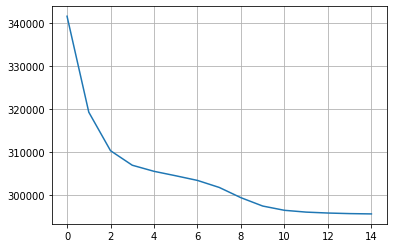

In [57]:
my_kpp = Kmeansplusplus()
my_kpp.fit(features_train,10,15,"manhattan")

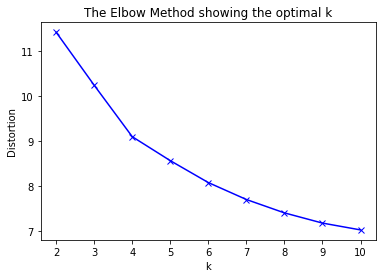

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions_2 = []
K_2 = []
for k in range(2,11) :
    K_2.append(k)
    kmeanModel = KMeans(n_clusters=k).fit(features_train)
    kmeanModel.fit(features_train)
    distortions_2.append(sum(np.min(cdist(features_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features_train.shape[0])

# Plot the elbow
plt.plot(K_2, distortions_2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [12]:
def elbow_2(part):
    
    #dummy_kmean = Kmeans()
    if part == 1 :
        elbow_distances = []
        for i in range(2,12):
            my_kmeans = Kmeansplusplus()
            my_kmeans.fit(features_train,i,20,"euclidean")
            elbow_distances.append(my_kmeans.return_elbow_distance())
            #print(elbow_distances[-1]," ",i)
    
        dummy_list = []
        for i in range(2,12):
            dummy_list.append(i)
    
        plt.title("Euclidean")
        plt.plot(dummy_list,elbow_distances)
        plt.show()
    
    else :
        
        dummy_list = []
        for i in range(2,12):
            dummy_list.append(i)
            
        elbow_distances_2 = []
        for i in range(2,12):
            my_kmeans = Kmeansplusplus()
            my_kmeans.fit(features_train,i,20,"manhattan")
            elbow_distances_2.append(my_kmeans.return_elbow_distance())
        #print(elbow_distances[-1]," ",i)
    
        plt.title("Manhattan")
        plt.plot(dummy_list,elbow_distances_2)
        plt.show()


In [8]:
def silhouette_2(distance_metric):
    
    #elbow_distances = []
    silhouette_scores = []
    for i in range(2,12):
        my_kmeans = Kmeansplusplus()
        my_kmeans.fit(features_train,i,20,distance_metric)
        #elbow_distances.append(my_kmeans.return_elbow_distance())
        #print(elbow_distances[-1]," ",i)
        score1 = silhouette_score(features_train,my_kmeans.return_train_label())
        silhouette_scores.append(score1)
    
    dummy_list = []
    for i in range(2,12):
        dummy_list.append(i)
    
    #plt.title("Euclidean and Forgy")
    plt.title(distance_metric)
    plt.plot(dummy_list,silhouette_scores)
    plt.show()


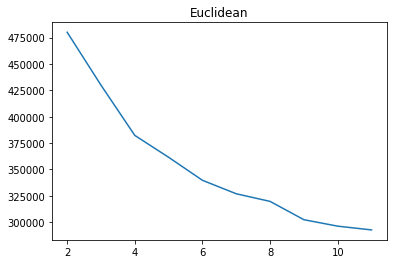

In [16]:
elbow_2(1)

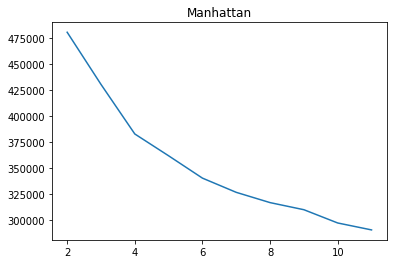

In [15]:
elbow_2(2)

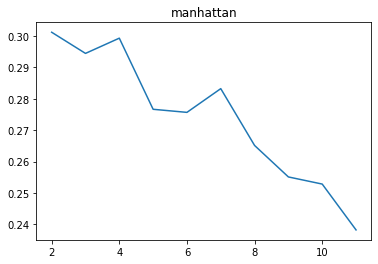

In [20]:
silhouette_2("manhattan")

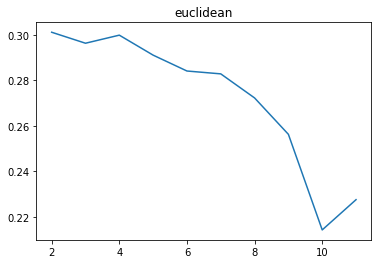

In [11]:
silhouette_2("euclidean")

In [ ]:
# after observing all the graphs , I feel 9 is the optimal number of clusters

In [11]:
plot_2 = Kmeansplusplus()
plot_2.fit(features_train,9,20,"manhattan")

In [36]:
y_predicted = plot_2.return_train_label()


In [41]:
tsne_2 = TSNE(n_components = 2 , random_state = 0)
plot_2_final = tsne_2.fit_transform(features_train)

In [42]:
y_predicted = np.array(y_predicted)
print(plot_2_final.shape)
print(y_predicted.shape)

(42000, 2)
(42000,)


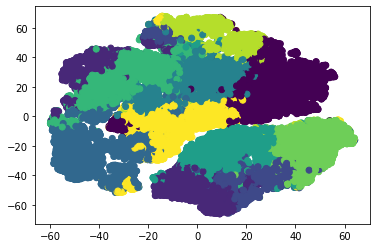

In [43]:

plt.scatter(plot_2_final[:,0],plot_2_final[:,1],c = y_predicted)

In [14]:
#homogenity score

kpp_prediction = plot_2.return_label(features_test)
from sklearn.metrics.cluster import homogeneity_score

homogeneity_score(kpp_prediction,labels_test)

0.5087793674783339

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

kmeanModel = KMeans(n_clusters=9).fit(features_train)
kmeanModel_pred = kmeanModel.predict(features_test)

In [17]:
homogeneity_score(kmeanModel_pred,labels_test)

0.4881270167900813

In [ ]:
#My homogenity score for the latent data is more than the sklearn Kmean model

In [15]:
kmeans_pred = plot_kmeans.return_label(fashion_test_features)
homogeneity_score(kmeans_pred,fashion_test_label)

0.5233183338792854

In [21]:
kmean_2 = KMeans(n_clusters = 8).fit(fashion_train_features)
kmean_2_pred = kmean_2.predict(fashion_test_features)
homogeneity_score(kmean_2_pred,fashion_test_label)

0.5351873130205698

In [ ]:
# Homogenity score for original data using my kmeans is 0.523 and for kmeans of sklearn is 0.535

In [ ]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [ ]:
# I believe that the latent space reprsentation with kmeans is much better than others because the homogenity score
# is more than sklearn.Kmeans and because of the Kmneansplusplus algo the convergence or finding the centroid is
# much faster once after initializing all the points